<img src="https://www.unad.edu.co/images/footer/logo-unad-acreditacion-min.png" width="780" height="140" align="right"/>

<p align="center">Curso:Machine Learning</p>

<p align="center"> Código Curso: 203008067 </p>

<p align="center"> Grupo: 203008067_14 </p>

 <p align="center"> Fase 5 - Evaluación Final</p>

 <p align="center">  Presentado por: Wagner Alonso Fernández Villalobos</p>

<p align="center"> Código: 203008067A_1702 </p>

 <p align="center">  Tutor(a): Rafael Roberto Ruiz Escorcia </p>

 <p align="center"> UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD </p>

<p align="center"> Fecha: 21/07/2024 </p>

# Acción 1: Analisis Exploratorio de Datos - (EDA)

#### 1. Lo primero que se hará, será importar todas las bibliotecas con las que se trabajarán.

El algoritmo, fue desarrollado en el lenguaje de programación Python, con las librerías Pandas, Matplotlib, y el paquete para Machine Learning llamano Sckit-Learn; basado en el libro de (Roldán, 2022) y el libro de Géron (2019).

In [1]:
import numpy as np# manipulacion de vectores y matrices
import pandas as pd# manipulación de datos
import matplotlib.pyplot as plt# para graficar
from mpl_toolkits.mplot3d import Axes3D # modulo de matplotlib para graficas en 3D
import seaborn as sns# librería basada en matplotlib para hacer graficos tipo parcela
from sklearn.model_selection import train_test_split#modulo para entrenar el modelo con datos
from sklearn.linear_model import LinearRegression# importar para la aplicación del modelo de regresióm lineal.
from sklearn.metrics import mean_squared_error# importar para la aplicación del ECM y RMSE

Se procede con leer el archivo ofimatico Excel (.csv) utilizando la librería pandas con su modulo _pd.read_csv()_

In [2]:
df = pd.read_csv('data/Anexo 2 - Predicción de la productividad de los empleados de la confección.csv')
"""lo que está dentro del parentesis cambiarlo dependendiendo de la ubicación del archivo"""

df#verificar que muestre el Dataframe

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


#### 2. Exploratory Data Analysis (EDA) o Análisis Exploratorio de Datos

Según McKinney (2023) el analisis exploratorio de los datos, son las tecnicas que hace el experto en datos, para saber cual es la cantidad y calidad de datos que tiene el dataframe, dentro de esto se encuentran las dimensiones en filas y columnas, también la media, moda y mediana.

Descripcion del DataFrame, para ver todos sus componentes; incluyendo desde la mediana a la moda, aclarando que es el analisis de columnas y fila que tiene dicho DataFrame

In [3]:
df.describe()#función de pandas para mostar toda la información estadistica de Dataframe

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Información del DataFrame, para ver todos sus componentes; incluyendo desde la mediana a la moda, aclarando que es el analisis de columnas y fila que tiene dicho DataFrame

In [4]:
df.info()#funcion pandas para mostrar informacion del df e incluso mostrará lo consumido en memoria

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

Se utiliza el metodo .shape de Pandas, para describir la cantidad en el conjunto de datos en filas y columnas.

In [5]:
""""variable para para describir el numero de filas y columnas"""
filas, columnas = df.shape

print(f'Número de filas: {filas}')
print(f'Número de columnas: {columnas}')

Número de filas: 1197
Número de columnas: 15


#### 3. Gráficas

Creación de la gráfica de tipo parcela, para ver como se comportan cada una de las variables, teniendo en cuenta lo consultado en libro de Wilke (2019)

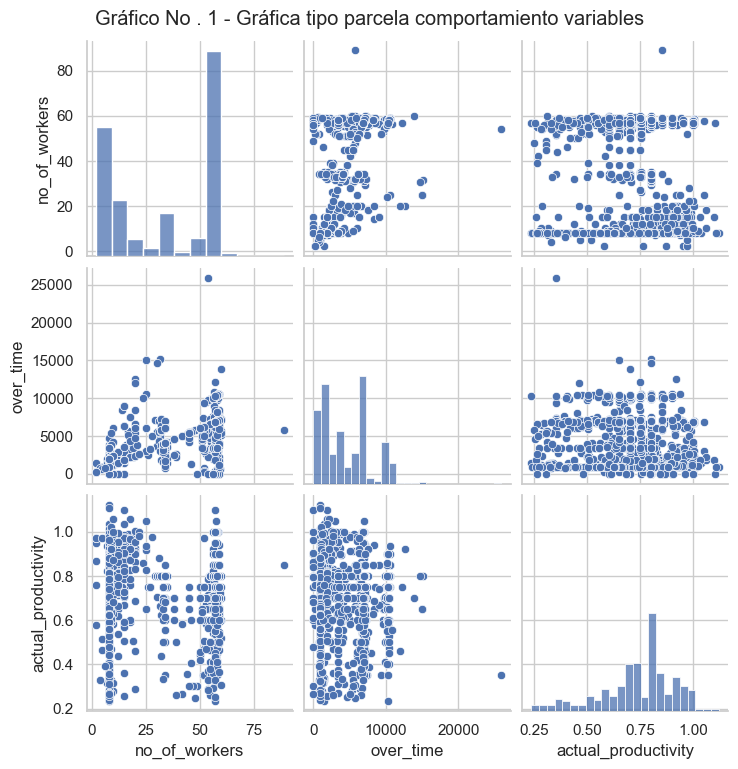

In [6]:
sns.set(style='whitegrid', context='notebook')

"""Conforme a lo anterior, se explican los siguientes método importantes en la creación gráfico:
   context: para que no la muestre la grafica muy grande 
   style: el tipo de color que se le asigna al grafico """

columns = ['no_of_workers', 
           'over_time', 
           'actual_productivity']#columnas que se incluyen en el gráfico


g = sns.pairplot(df[columns], height=2.5)# Crear la gráfica tipo parcela.


g.fig.suptitle('Gráfico No . 1 - Gráfica tipo parcela comportamiento variables', 
                y=1.02) #se ajusta el valor de 'y' para evitar superposición, es decir que no quede disparejo.
plt.show()


Gráfica tipo histograma

Según Wilke (2019), un histograma se utiliza generalmente para interpretar las variaciones de los datos, ofrecen una mejor visión de la información proporcionada por los datos para interpretarlos más espcificamente e identificar causas o problemas.

Gráfico No . 2 - Gráfica tipo parcela comportamiento variables


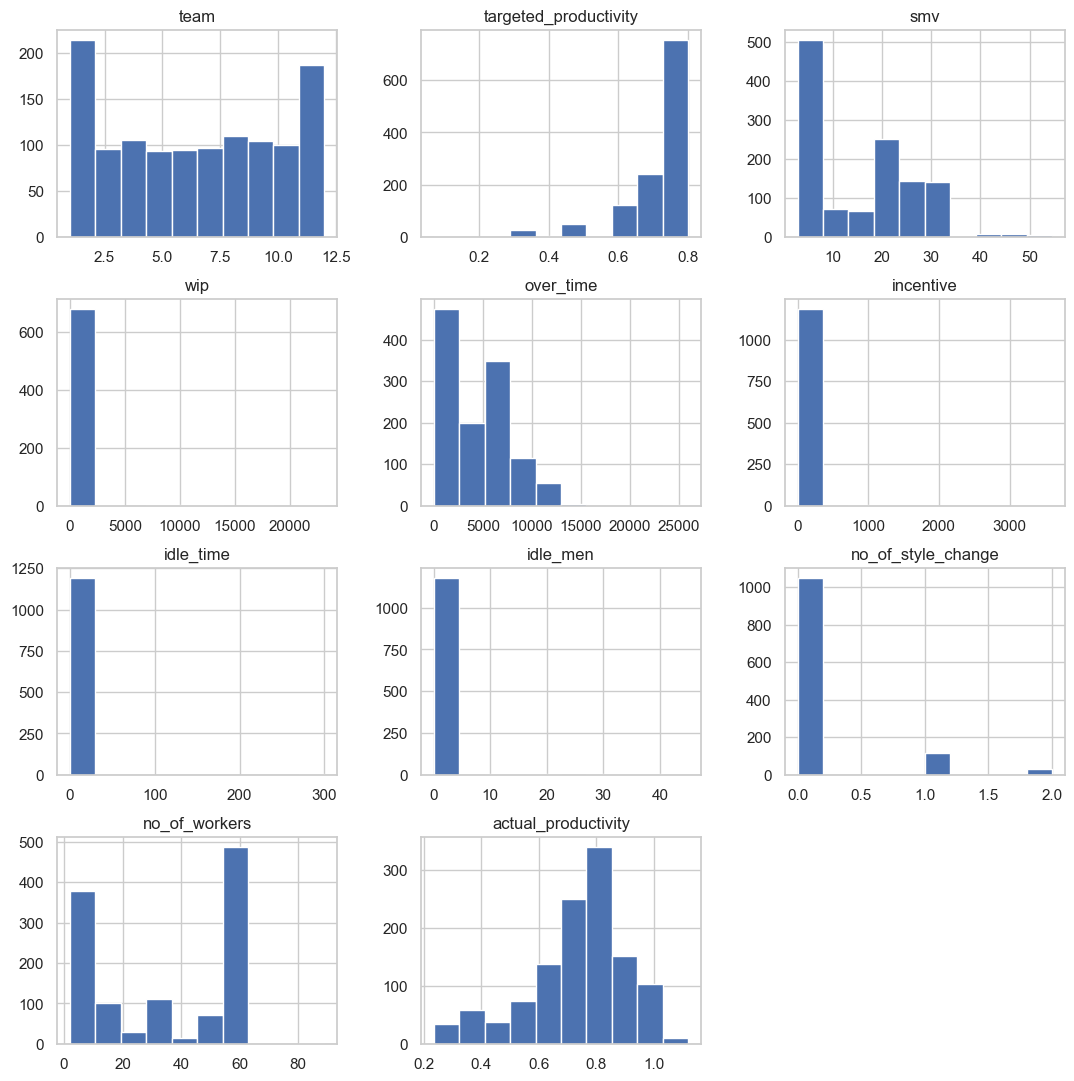

In [7]:
df.hist(figsize=(13, 13))#Ajustar el tamaño del gráfico si lo deseas
plt.subplots_adjust(bottom=0.1)#Ajusta el espacio inferior para los títulos de los ejes.
print('Gráfico No . 2 - Gráfica tipo parcela comportamiento variables')
plt.show()

# Acción 2: Aplicación modelo logístico.

* Construir la variable ‘nivel_productividad’ con niveles alto y bajo. Considere nivel alto a productividad real > 0.7 y nivel bajo a productividad real <=0.7.
* Seleccionar una base de entrenamiento (80%) y una base de prueba (20%).
* Con la base de entrenamiento aplicar un modelo de regresión logística para predecir el ‘nivel_productividad’ basado en el número de trabajadores de cada equipo y el tiempo extra en minutos.
* Calcular la matriz de confusión 
* Calcule la precisión (Accuracy) sobre los datos de prueba.
* Calcule el ratio de verdaderos positivos (Recall) sobre los datos de prueba.
* Calcule la especificidad (Specificity) sobre los datos de prueba.

#### 1. Importar librerías

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### 2. Lectura del fichero en formato .csv

In [9]:
df = pd.read_csv('data/Anexo 2 - Predicción de la productividad de los empleados de la confección.csv')

#### 3. Construcción de la variable de productividad

In [10]:
df['nivel_productividad'] = df['actual_productivity'].apply(lambda x: 'alto' if x > 0.7 else 'bajo')

#### 4. Construcción del modelo de Rgeresión Logística

In [11]:
#variables predictoras (X) y la variable objetivo (y)
X = df[['no_of_workers', 'over_time']]
y = df['nivel_productividad']

#division de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#entrenamiento del modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

#predicciones sobre la base de prueba
y_pred = model.predict(X_test)

Matriz de confusion

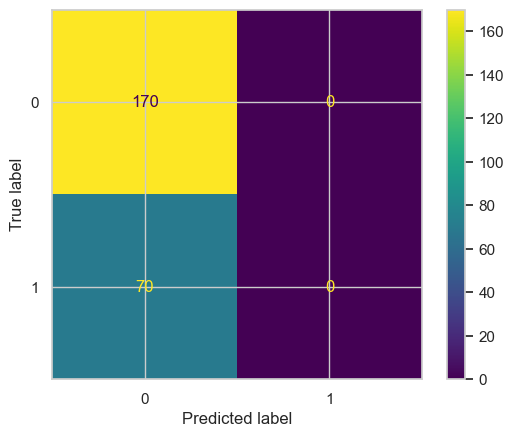

In [12]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import ConfusionMatrixDisplay

predict_cmtrx = model.predict(X_test) 
cmtrx = confusion_matrix(y_test, predict_cmtrx) 

visualization_cmtrx = ConfusionMatrixDisplay(cmtrx)
visualization_cmtrx.plot()

##### Calculo de la matriz de confusion

In [13]:
precision_lrm = accuracy_score(y_test, predict_cmtrx) 

precision_percentage = precision_lrm * 100 

print(f'El porcentaje de precisión es del: {precision_percentage:.2f} %') 

El porcentaje de precisión es del: 70.83 %


##### Calculo de los verdaderos positivos o recall sobre los datos de prueba

In [14]:
recall_lrm = recall_score(y_test, predict_cmtrx, pos_label='bajo')# se agina un poslabel para especificar si la etiqueta es positiva o es negativa
recall_percentage = recall_lrm * 100
print(f'El porcentaje de sensibilidad es del: {recall_percentage:.2f} %')

El porcentaje de sensibilidad es del: 0.00 %


##### Calculo de la espeficidad teniendo en cuenta los datos de prueba

In [15]:
specificity_lrm = cmtrx[0,0]/(cmtrx[0,0]+cmtrx[0,1]) 

specificity_percentage = specificity_lrm *100 

print(f'El porcentaje de especificidad es del: {specificity_percentage:.2f} %') #Imprimimos el porcentaje de Especificidad

El porcentaje de especificidad es del: 100.00 %


# Acción 3: Aplicación K-NN.

* Con la base de entrenamiento, aplicar un modelo KNN de aprendizaje automático que pueda aprender del número de trabajadores de cada equipo y el tiempo extra en minutos, para predecir “nivel_productividad”.
* Calcular la matriz de confusión 
* Calcule la precisión (Accuracy) sobre los datos de prueba.
* Calcule el ratio de verdaderos positivos (Recall) sobre los datos de prueba.
* Calcule la especificidad (Specificity) sobre los datos de prueba.

#### 1. Importar librerías

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#### 2. Construcción de la variable nivel de productividad

In [17]:
df['nivel_productividad'] = df['actual_productivity'].apply(lambda x: 'alto' if x > 0.7 else 'bajo')

#### 3. Creación del modelo de vecino cercano (KNN)

In [18]:
#seleccionar las variables predictoras (X) y la variable objetivo (y)
X = df[['no_of_workers', 'over_time']]
y = df['nivel_productividad']

#división de los datos en conjuntos de entrenamiento y prueba 80/20
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, #20% de prueba
                                                    random_state=42)

#creación del modelo de vecino cercano
model_knn = KNeighborsClassifier(n_neighbors=5, 
                                 metric = 'minkowski', 
                                 p=2)

#crear y entrenar el modelo KNN
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

##### Calculo de la matriz de confusion

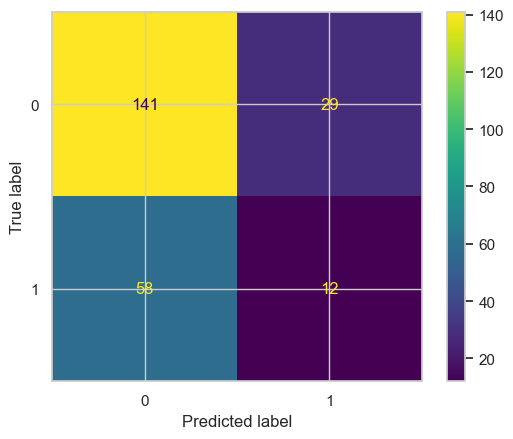

In [19]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import ConfusionMatrixDisplay

predict_knn = model_knn.predict(X_test) 
cm_knn = confusion_matrix(y_test, predict_knn) 

v_knn_cm = ConfusionMatrixDisplay(cm_knn)
v_knn_cm.plot()

##### Calculo de la presicion del modelo

In [20]:
precision_knn = accuracy_score(y_test, predict_knn) 
precision_percentage_knn = precision_knn * 100 

print(f'El porcentaje de precisión es del: {precision_percentage_knn:.2f} %')

El porcentaje de precisión es del: 63.75 %


##### Calculo de los verdaderos positivos

In [21]:
recall_knn = recall_score(y_test,predict_knn, pos_label='bajo') #Asignamos las variables Y prueba y predicción para calcular la Sensibilidad.

recall_percentage_knn = recall_knn *100 #La sensibilidad responde a la pregunta "¿Qué proporción de positivos reales se identificó correctamente?"

print(f'El porcentaje de sensibilidad es del: {recall_percentage_knn:.2f} %')

El porcentaje de sensibilidad es del: 17.14 %


##### Aplicación del porcentaje de la especificidad

In [22]:
specificity_knn = cm_knn[0,0]/(cm_knn[0,0]+cm_knn[0,1]) 
specificity_percentage_knn = specificity_knn *100 
print(f'El porcentaje de especificidad es del: {specificity_percentage_knn:.2f} %') 

El porcentaje de especificidad es del: 82.94 %


# Acción 4: Aplicación Árboles de decisión (CART).

* Con la base de entrenamiento, aplicar un modelo de árboles de decisión para distinguir “nivel_productividad” bajo y alto usando todas las características.
Usando la función graphviz() visualizar el diagrama de árbol.
* Calcular la matriz de confusión 
* Calcule la precisión (Accuracy) sobre los datos de prueba.
* Calcule el ratio de verdaderos positivos (Recall) sobre los datos de prueba.
* Calcule la especificidad (Specificity) sobre los datos de prueba.

#### 1. Importar librería para verificar datos faltantes

Para empezar, se hará un analisis exploración de datos faltantes, utilizando la librería missingno, según Rodríguez (2021) es una librería para graficar datos faltantes en los conjuntos de datos, para instalarla, es cuetion de ingresar en la consola el comando  **_pip install missingno_**

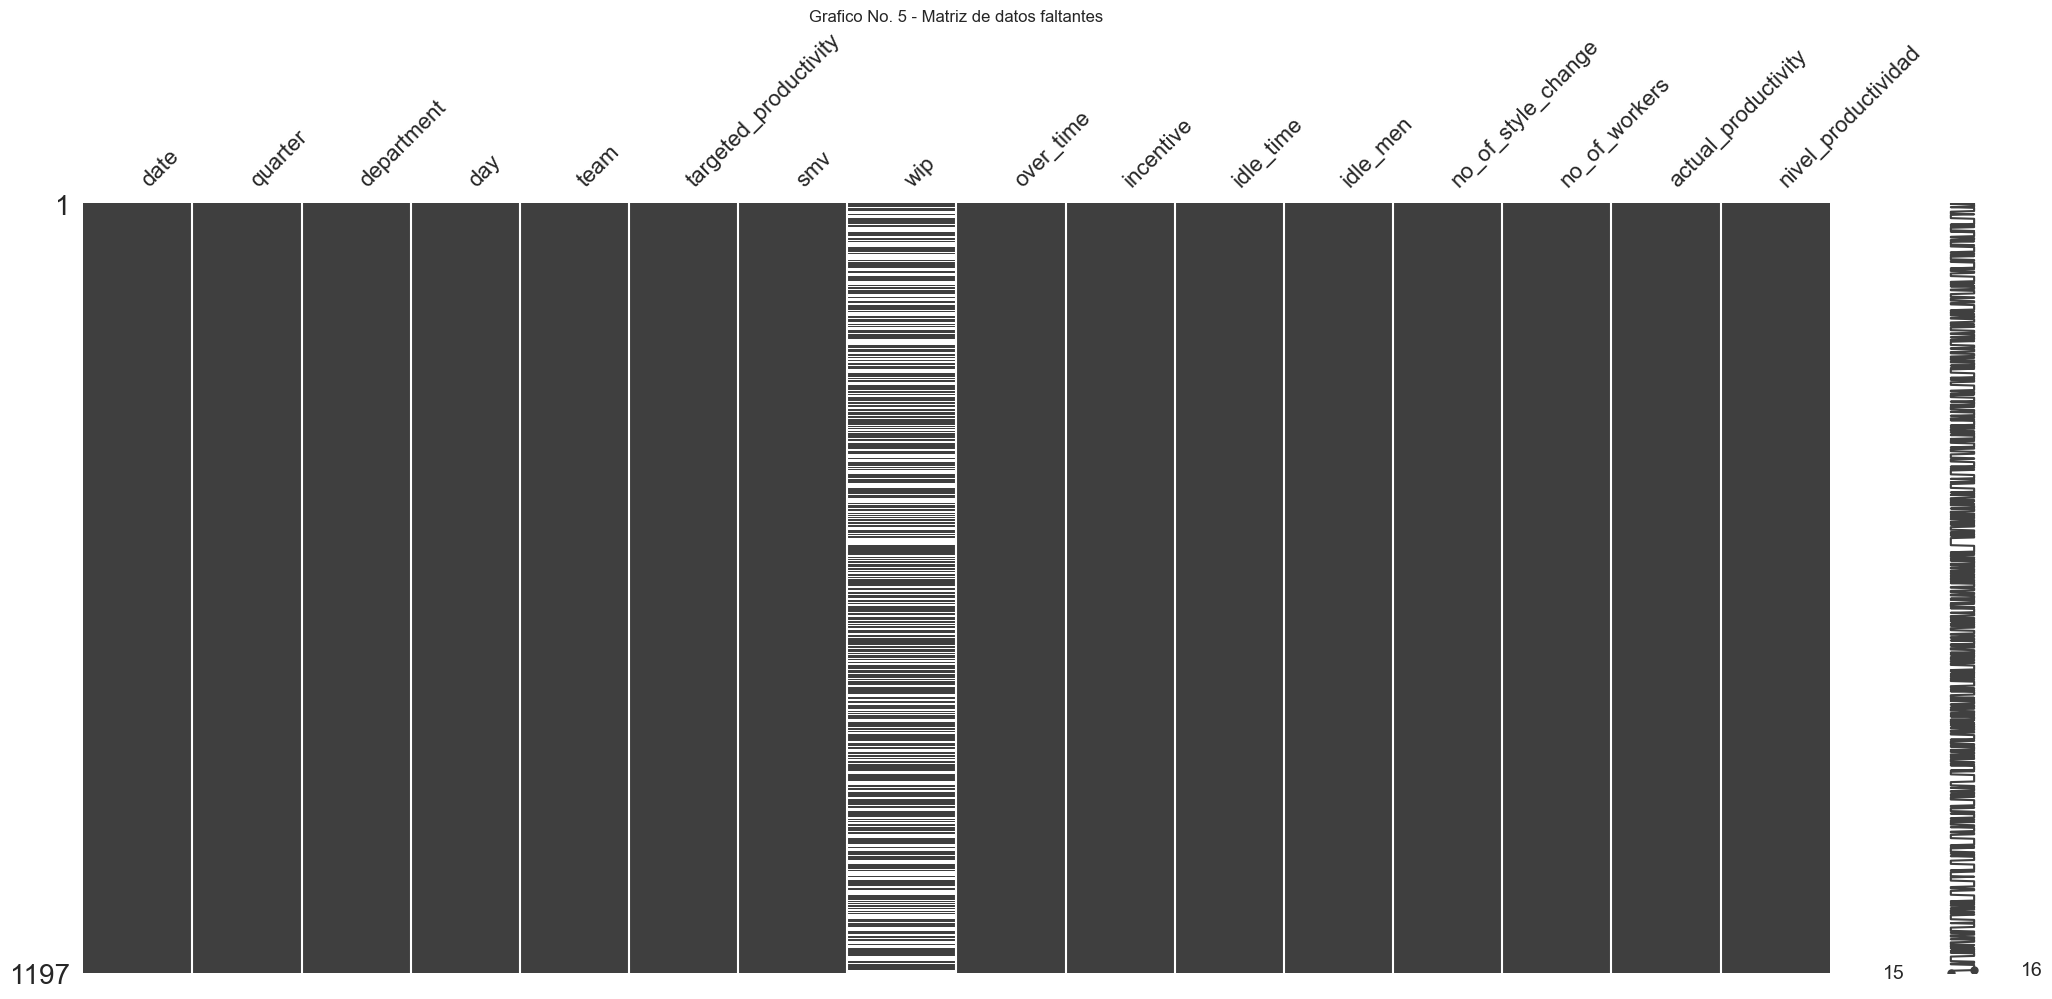

In [23]:
import missingno as msno

#graficar la matriz de datos faltantes:
msno.matrix(df)
plt.title("Grafico No. 5 - Matriz de datos faltantes")
plt.show()

Verificar la cantidad de datos faltantes en el DataFrame

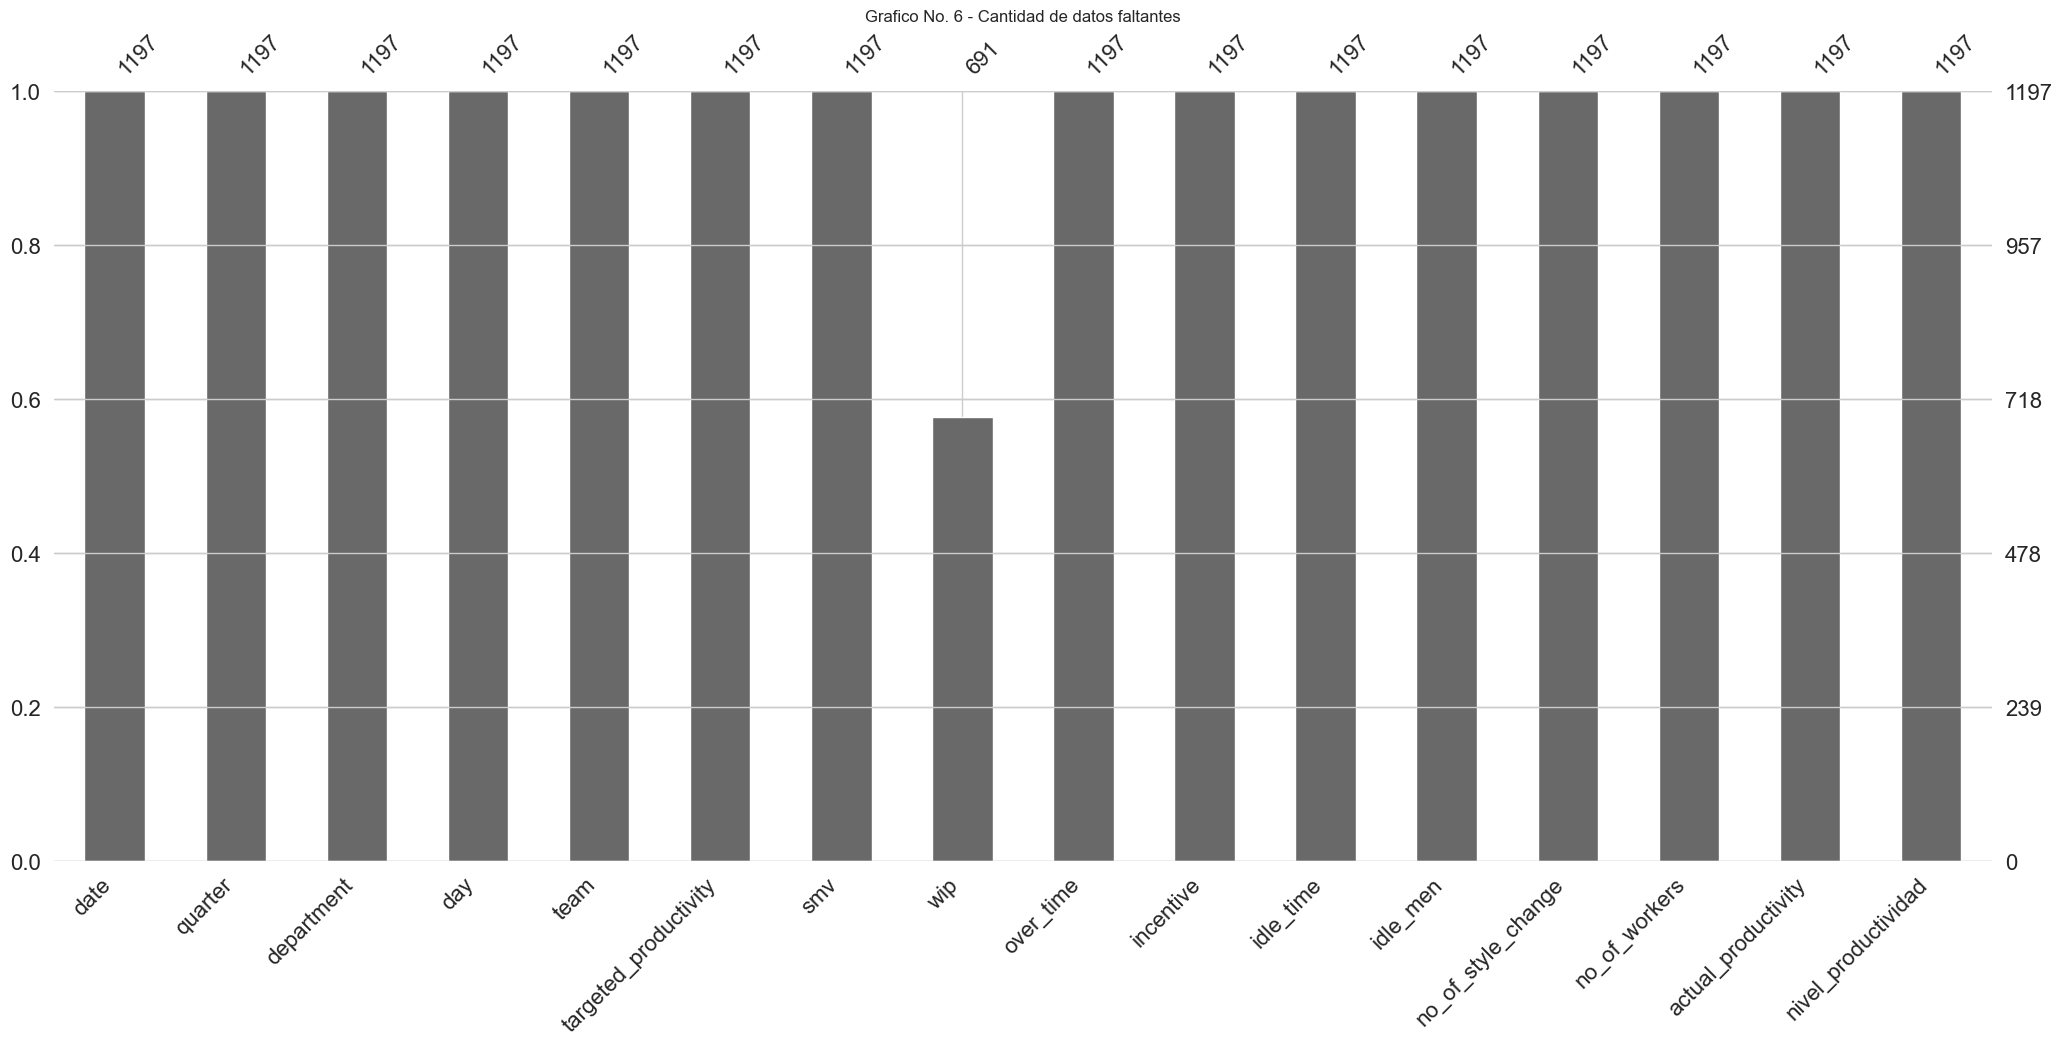

In [24]:
msno.bar(df)
plt.title("Grafico No. 6 - Cantidad de datos faltantes")
#plt.xlabel('Cantidad de registros')
#plt.ylabel('Nombre de filas')
plt.show()

*Nota*: La columna wip, tiene 691 datos registrados, faltando de 1197 que tienen todas las columnas, faltan 506 registros, los cuales se van a imputar.

#### 2. Imputación de datos teniendo en cuenta la mediana

Observando la gráfica anterior, se observa que la columna "wip", que viene siendo el trabajo en progreso, la cual  incluye la cantidad de elementos sin terminar por productos, está con datos nulos o incompletos; con esto se procederá hacer la imputación de datos por utilizando la mediana, con la librería Pandas Géron (2019).

In [25]:
df_imputed = df['wip'].median()#calcular la media de la columna 'wip'
df['wip'].fillna(df_imputed, 
                 inplace=True)#imputar los valores faltantes en la columna 'wip' con la media calculada
#Adicional - df.to_csv("Anexo 2 - Predicción de la productividad de los empleados de la confección_imputed.csv", index=False)#exportar el nuevo dataframe con la columna imputada a un nuevo archivo

C:\Users\WAGNER FERNÁNDEZ\AppData\Local\Temp\ipykernel_21456\1498085955.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wip'].fillna(df_imputed,


Dataframe imputado en su totalidad

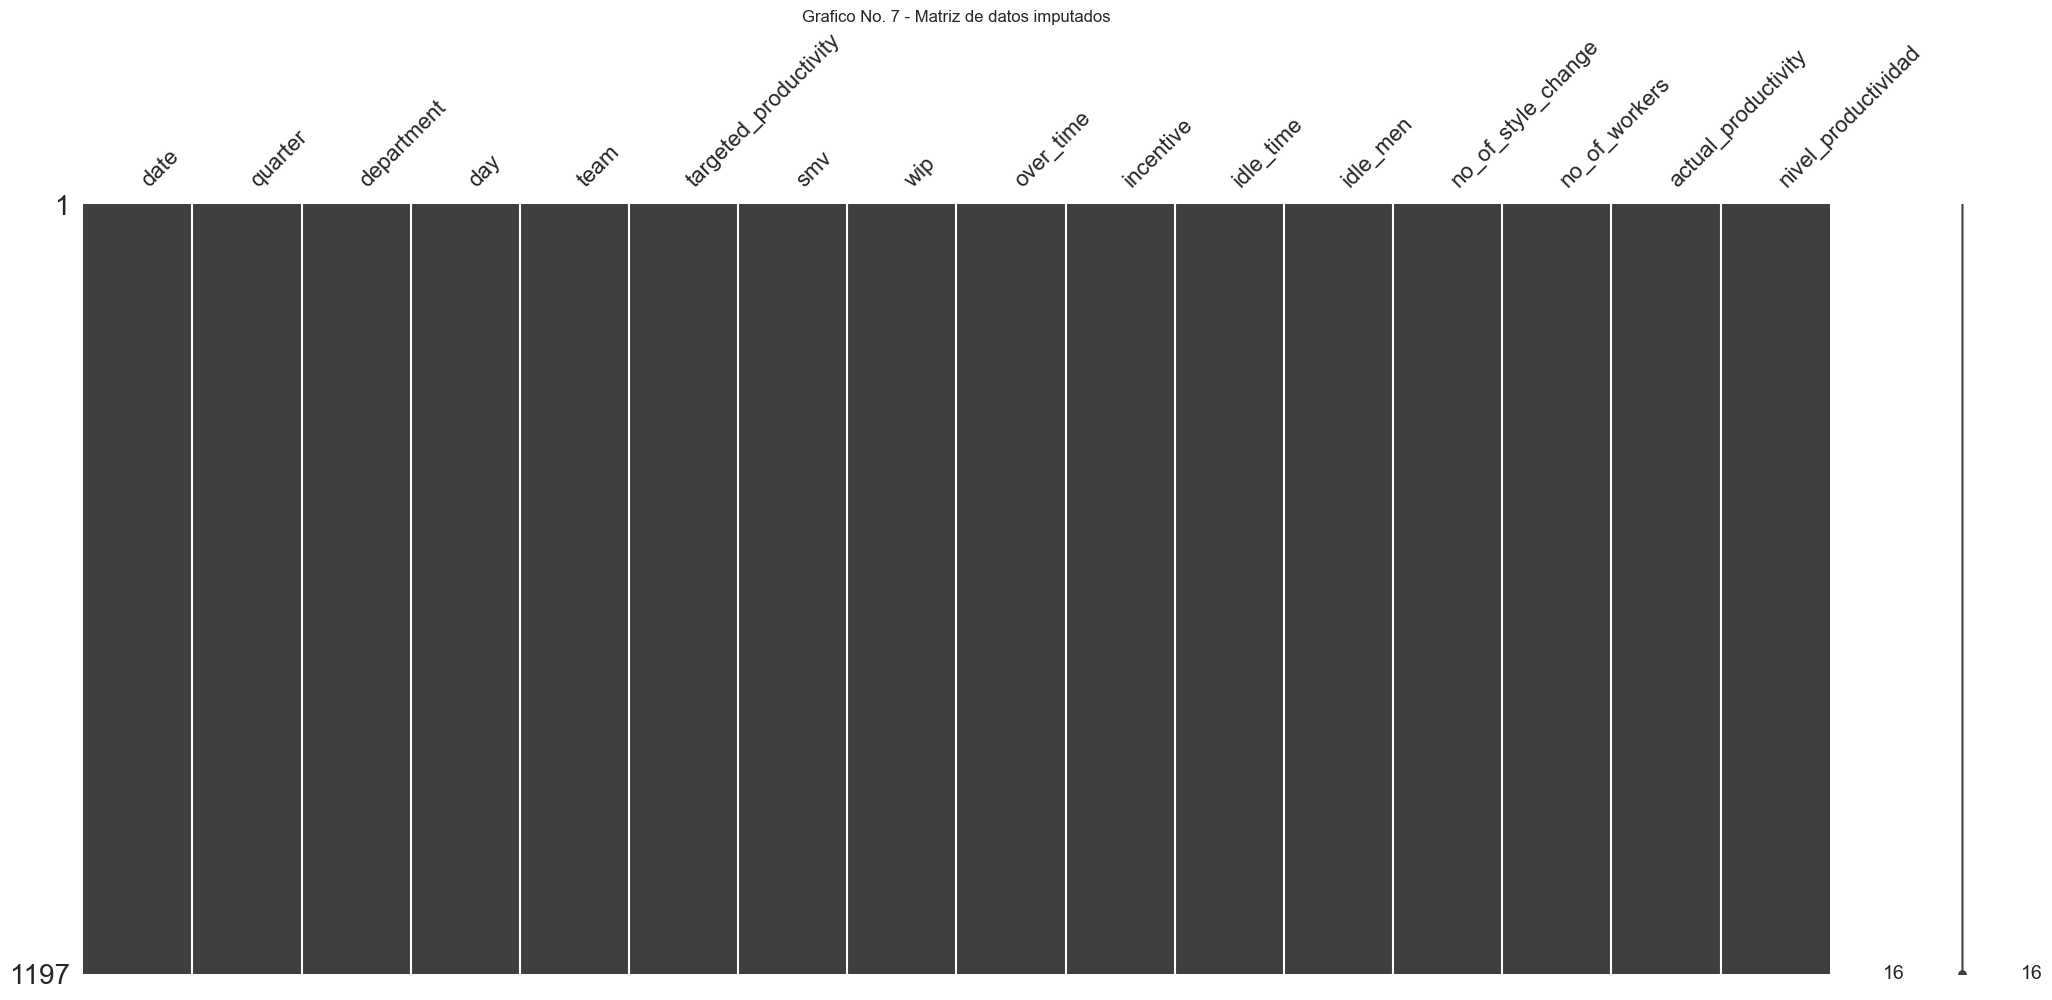

In [26]:
msno.matrix(df)
plt.title("Grafico No. 7 - Matriz de datos imputados")
plt.show()

#### 3. Desarrollo del modelo Arbol de decisión (CART)

Se procede con importar las librerías necesarias para preparar los datos, crear el algoritmo supervisado y graficarlo.

In [27]:
import os # acceder a funciones y herramientas del sistema operativo
import graphviz # graficar el arbol
from IPython.display import Image # modulo para crear imagenes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import tree

Variable de entorno, donde se encuentra instalado GraphViz caso Windows

<div class=text-justify> Consultando la página de stackoverflow (s.f), explican los pasos para confirgurar e instalar el software de Graphviz, que para el caso de desarrollo, se utilizó una maquina con Sistema Operativo Windows en su versión 11; luego de su instalación, se configuró las variables de entorno para que se integrara en la consola o PATH de windows; esto hace que funcione el modulo y pueda generar los respectivos gráficos. Aunado a lo anterior, al importar la librería os, se crea un fragmento de codigo, ahí se almacena una lista de directorios donde el sistema operativo busca archivos ejecutables cuando se ejecuta un comando.</div>

Se descargó el software Graphviz para Windows a través del siguiente enlace: https://graphviz.org/download/

In [28]:
""" módulo os da acceso a un conjunto de funciones que permiten interactuar con el sistema operativo de la computadora. """
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'#cambiar la ruta donde se ubica la instalación del programa en la computadora.
#para la ruta anterior, es donde se encuentra programa graphviz instalado el cual tocó desde windows configurar las variables de entorno. - https://www.youtube.com/watch?v=JYAHwQ_tMG0

Procesar las columnas categóricas

<div class=text-justify> Este fragmento de código, lo que hace es iterar, codificar o transformar a través de columnas específicassus valores categóricos en etiquetas numéricas usando LabelEncoder y opcionalmente almacena los codificadores para su uso posterior. Los valores codificados se asignan directamente a las columnas correspondientes en el DataFrame.</div>

In [29]:
#procesar columnas categóricas
label_encoders = {}
for column in ['day', 'quarter', 'department']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

Definición de variable de _"nivel de productividad"_ asignandole categorías si es alto o bajo

In [30]:
df['nivel_productividad'] = df['actual_productivity'].apply(lambda x: 'alto' if x >= 0.75 else 'bajo')#definir nivel de productividad 'bajo' o 'alto'


X = df.drop(['date', 'actual_productivity', 'nivel_productividad'], axis=1)#separación de características y etiquetas
y = df['nivel_productividad']

""" división de los datos en conjuntos de entrenamiento y prueba"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Desarrollar el modelo de arbol de decisión y calcular la precisión del modelo

In [31]:
"""creación del modelo:"""
cart = DecisionTreeClassifier(random_state=42)#entrenar el modelo de árbol de decisión

"""entrenamiento del modelo"""
cart.fit(X_train, y_train)


y_pred = cart.predict(X_test)#predicciones sobre la base de prueba



Codificar la visualización el arbol de decision

In [32]:
dot_data = tree.export_graphviz(cart, out_file=None, 
                                feature_names=X.columns,  
                                class_names=cart.classes_,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  

#Adicional: graph.render("arbol_decision")  # Guarda el gráfico en un archivo PDF llamado "arbol_decision" en formato pdf y se guarda en el area de trabajo

Visualizar o plotear el arbol de decisión en el cuaderno

El fragmento de código, realiza lo siguiente:


* Codificar a formato .png lo desarrollado anteriormente.
* Renderizar la elaboración del arbol.
* Buscar la imagen del archivo donde se encuentra el arbol de decisión.

Gráfico No . 8 - Arbol de decisión nivel de productividad


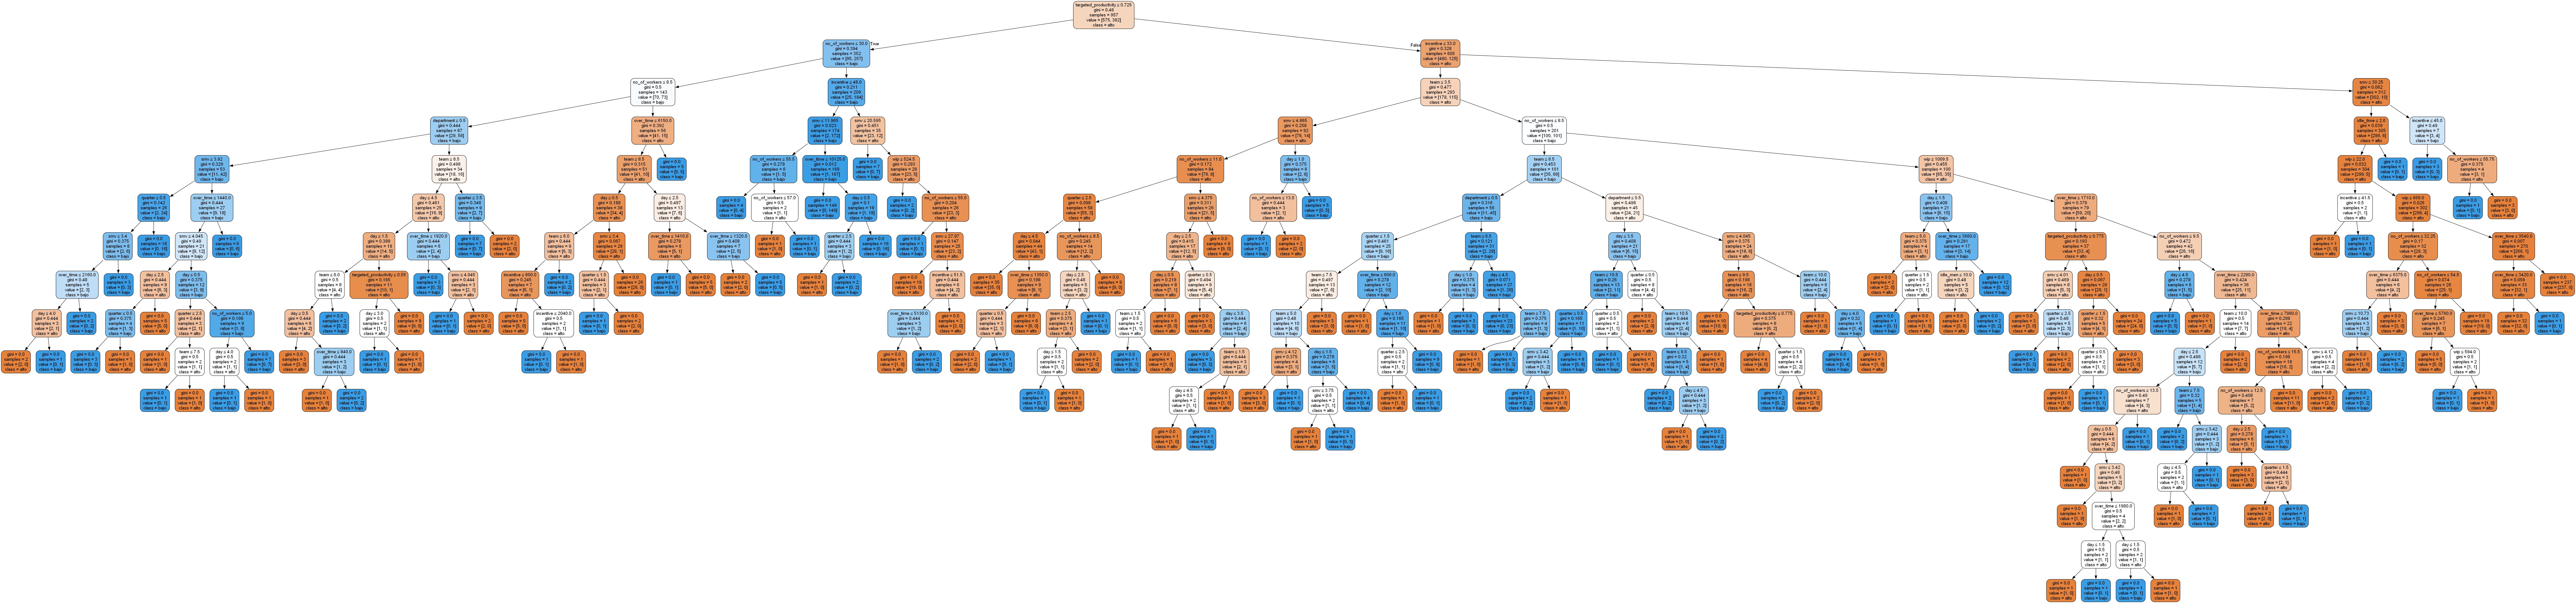

In [33]:
print('Gráfico No . 8 - Arbol de decisión nivel de productividad')
graph.format = 'png'
graph.render("arbol_decision")
Image(filename="arbol_decision.png") 

##### Creación de la matriz de confusión 

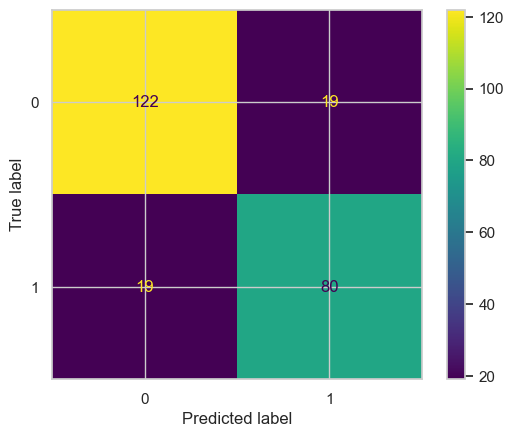

In [34]:
from sklearn.metrics import confusion_matrix #Importamos la función matriz de confusión 
from sklearn.metrics import accuracy_score #Importamos la función precisión
from sklearn.metrics import recall_score #Importamos la función recall
from sklearn.metrics import ConfusionMatrixDisplay 

#Calculamos la matriz de confusión.
predict_cart = cart.predict(X_test) #Indicamos la variable x_test, que es el conjunto de datos reservados para las pruebas, los cuales estamos utilizando para predecir.
matriz_cart = confusion_matrix(y_test, predict_cart)  #Asignamos las variables Y prueba y predicción para calcular la matriz de confusión

#Visualizar matriz de confusión.
vis_matriz_cart = ConfusionMatrixDisplay(matriz_cart)
vis_matriz_cart.plot()

##### Creación sobre las predicciones de prueba

In [35]:
precision_cart = accuracy_score(y_test, predict_cart)  

precision_percentage_cart = precision_cart * 100  

print(f'El porcentaje de precisión es del: {precision_percentage_cart:.2f} %')

El porcentaje de precisión es del: 84.17 %


##### Calculo de _recall_ o los verdaderos positivos

In [36]:
recall_cart = recall_score(y_test,
                           predict_cart, 
                           pos_label='bajo') 

recall_percentage_cart = recall_cart *100  

print(f'El porcentaje de sensibilidad es del: {recall_percentage_cart:.2f} %') 

El porcentaje de sensibilidad es del: 80.81 %


##### Calculo del nivel de especificidad

In [37]:

specificity_cart = matriz_cart[0,0]/(matriz_cart[0,0]+matriz_cart[0,1]) 

specificity_percentage_cart = specificity_cart*100  

print(f'El porcentaje de especificidad es del: {specificity_percentage_cart:.2f} %') 

El porcentaje de especificidad es del: 86.52 %


# Acción 5: Conclusiones.

**Modelo Regresión logistica**
 * Accuracy: 70.83% 
 * Recall: 0.0%
 * Specificity: 100%

**Modelo vecino cercano (KNN)**
 * Accuracy: 63.75%
 * Recall:17.14% 
 * Specificity:82.94%

**Modelo Arbol de decisión (CART)**
 * Accuracy: 84.17%
 * Recall: 80.81%
 * Specificity: 86.52%

<p style="text-align: justify;"> Se analiza los resultados obtenidos en las métricas a los datos que se obtuvieron, se puede inferir que, la precisión de los modelos, se observa que el Árbol de decisión tiene una mejor precisión, de igual forma, se puede observar que tiene un buen balance entre Recall y Specificity, indicando que es un modelo eficiente para detectar casos que son realmente positivos como negativos; sin embargo, basandose en los resultados de dichas métricas, el Árbol de Decisión es el modelo más acertado para realizar tareas de clasificación o predicción de categorías para el conjunto de datos objeto de estudio. Gerón (2019)</p>

# Referencias

Géron, A. (2019). Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow: Unsupervised learning techniques. Van Duuren Media.

McKinney, W. (2023). Python para análisis de datos. ANAYA MULTIMEDIA.

Raschka, S., & Mirjalili, V. (2017). Python Machine Learning - Second Edition: Vol. 2nd ed. Packt Publishing. (pp. 103-107). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1606531&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_103

Rodríguez, D. (2021, 24 octubre). Visualización de valores faltantes con Missingno. Analytics Lane. https://www.analyticslane.com/2021/12/06/visualizacion-de-valores-faltantes-con-missingno/#google_vignette

Romero Duque, G. A., González Prieto, C. A., Díaz Barriosnuevos, M. A., & Rueda Menjura, N. A. (2023). Revisión y perspectivas para la construcción de bases de datos robustas con datos faltantes: caso aplicado a información financiera. Tecnura, 27(75), 14–37. https://doi-org.bibliotecavirtual.unad.edu.co/10.14483/22487638.18268

Roldán, R. C., Martín, E. M., & Rodríguez, A. R. (2019). Big data con Python: recolección, almacenamiento y proceso. Alfaomega.

«RuntimeError: Make sure the Graphviz executables are on your system’s path» after installing Graphviz 2.38. (s. f.). Stack Overflow. https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

Wilke, C. O. (2019). Fundamentals of Data Visualization: A Primer on Making Informative and Compelling Figures (1.). O’Reilly Media.